In [2]:
from astropy.cosmology import Planck13
import astropy.units as u
import astropy.cosmology.units as cu
import astropy.constants as const
from astropy.table import Table
import astropy.io.ascii as asciitable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

Setup

In [3]:
plt.rcParams["font.family"] = "serif" # Most important setup step
plt.rcParams["font.serif"] = "Times New Roman"

# empty dataframe to store all the POPPIES data
data_full = pd.DataFrame()

# make dataframes for previous work
Neeleman = pd.read_csv("neeleman.csv")
Inayoshi = pd.read_csv("inayoshi.csv")

Get the data

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\o'
C:\Users\nevin\AppData\Local\Temp\ipykernel_10952\2087978301.py:4: SyntaxWarning: invalid escape sequence '\s'
  field_data = pd.read_csv("POPPIES"+str(field_num)+"lines_catalog_nevin.dat",sep="\s+")
C:\Users\nevin\AppData\Local\Temp\ipykernel_10952\2087978301.py:34: SyntaxWarning: invalid escape sequence '\o'
  ax1.set(xlabel="redshift (z)",ylabel="Black Hole Mass ($M_\odot$)",yscale="log")


[415.15559644 340.73278923 258.03266332 262.22106608] km / s
[ 453.20643139  621.34190891  562.90629927  344.93808673 1345.75650906
  374.13815864  505.37283226  477.85369086  953.63996679 1272.56383357
  573.05105722  261.70809201  720.72928713  469.20128953  378.99374647
  354.27052137  236.39146575  561.25191121  437.34541054  552.27114787
  297.22430103  374.68707125  619.80037842  327.43179703  442.54888123
  321.32900787  352.01283028  549.41999137  378.14220538  209.93204823
  594.7448383   643.19917705  512.56115884] km / s
[ 548.60066565  634.22189137  472.65294585  607.72128649  444.90489988
  582.08949281  380.73648338  516.72400946 1268.26793628  382.32869508
  308.86587914  213.11190892  304.94003513  311.30267756  558.51109754] km / s
[364.44017406 512.13787052 243.23343984 273.79990679 326.3434491
 201.98841714 388.2184007  388.45069275] km / s


C:\Users\nevin\AppData\Local\Temp\ipykernel_10952\2087978301.py:19: RuntimeWarning: invalid value encountered in log10
  Masses = 10**(0.683 + 6.688 + 0.812*(np.log10(luminosities.value) - 42) + 1.634 * ((np.log10(velocity_disp.value)) - 3.5)) # solar masses


[4127.29438941 1902.04134772  140.71353213 3206.43288313  512.15752416
  379.47274674  290.08852269 2223.68246667  890.38134834  606.98767991
  414.47453815  587.9299524  1325.52285131 1128.67781422 3839.7048293
  607.1573491   803.35446646  640.42904073 1193.00381866  520.34550992
  309.48779024  532.73429907 1397.17620129 3047.68749685  298.39837444
  471.05786719  811.00257681  903.77432172 1049.43021591  311.01842678] km / s


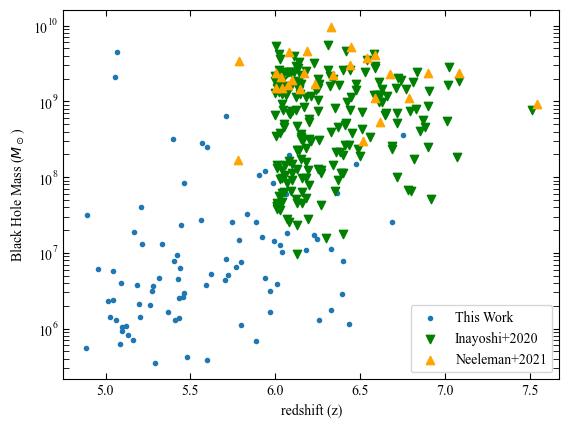

In [4]:
fig, ax1 = plt.subplots()
def get_data2(field_num):
  # retrieve data
  field_data = pd.read_csv("POPPIES"+str(field_num)+"lines_catalog_nevin.dat",sep="\s+")
  field_broads = np.genfromtxt(fname=str(field_num)+"_Ha.txt")
  broad_data = field_data[field_data["objid"].isin(field_broads)]

  # calculate luminosities
  luminosity_distance = (broad_data["redshift"].tolist()*cu.redshift).to(u.Mpc, cu.redshift_distance(Planck13,kind="luminosity")) # Megaparsecs
  flux = np.array(broad_data["ha_6565_flux"].tolist()) * u.erg / (u.cm**2 * u.s) # taken directly from the data, units con
  luminosities = (4*np.pi*luminosity_distance**2*flux).to(u.erg / u.s)

  # calculate velocity dispersion
  ha_obs = (1 + np.array(broad_data["redshift"].tolist())) * 6564.610 * u.AA
  velocity_disp = (1 - (ha_obs/(ha_obs + (broad_data["fwhm"].tolist()*u.AA)))) * const.c.to(u.km / u.s)
  print(velocity_disp)

  # calculate masses and append to data_full
  Masses = 10**(0.683 + 6.688 + 0.812*(np.log10(luminosities.value) - 42) + 1.634 * ((np.log10(velocity_disp.value)) - 3.5)) # solar masses
  broad_data.insert(loc=6,column="luminosity",value=luminosities.value)
  broad_data.insert(loc=7,column="mass",value=Masses) 
  broad_data = pd.concat([data_full,broad_data])
  return broad_data

data_full = get_data2(1)
data_full = get_data2(2)
data_full = get_data2(19)
data_full = get_data2(23)
data_full = get_data2(25)

ax1.scatter(data_full["redshift"],data_full["mass"],marker=".",label="This Work")
ax1.scatter(Inayoshi["Redshift"],Inayoshi["Mass"],marker="v",label="Inayoshi+2020",color="green")
ax1.scatter(Neeleman["Redshift"],Neeleman["Mass"],marker="^",label="Neeleman+2021",color="orange")
ax1.set(xlabel="redshift (z)",ylabel="Black Hole Mass ($M_\odot$)",yscale="log")
ax1.legend(loc="best")
ax1.tick_params(which="both",top=True,right=True,direction="in",length=4)


In [9]:
data23 = pd.read_csv("POPPIES023lines_catalog_nevin.dat",sep="\s+",usecols=np.arange(0,210,1))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nevin\AppData\Local\Temp\ipykernel_20364\4085439281.py:1: SyntaxWarning: invalid escape sequence '\s'
  data23 = pd.read_csv("POPPIES023lines_catalog_nevin.dat",sep="\s+",usecols=np.arange(0,210,1))
